DATASET

The dataset has the following list of attributes:

**Type of dependent variables (7 types of steel plates faults):**

| Attribute | No.	Attribute |
|--|--|
|1 | Pastry|
|2 | Z_Scratch|
|3 | K_Scratch|
|4 | Stains|
|5 | Dirtiness|
|6 | Bumps|
|7 | Other_Faults|

**27 independent variables:**

|Attribute No. |	Attribute | 	Attribute No. |	Attribute |
| -- | -- | -- | -- |
|1 |		X_Minimum |	15 |	Edges_Index |
|2 |		X_Maximum |	16 |	Empty_Index |
|3 |		Y_Minimum |	17 |	Square_Index |
|4 |		Y_Maximum |	18 |	Outside_X_Index |
|5 |		Pixels_Areas |	19 |	Edges_X_Index |
|6 |		X_Perimeter |	20 |	Edges_Y_Index |
|7 |		Y_Perimeter |	21 |	Outside_Global_Index |
|8 |		Sum_of_Luminosity |	22 |	LogOfAreas |
|9 |		Minimum_of_Luminosity |	23 |	Log_X_Index |
|10 |		Maximum_of_Luminosity |	24 |	Log_Y_Index |
|11 |		Length_of_Conveyer |	25 |	Orientation_Index |
|12 |		TypeOfSteel_A300 |	26 |	Luminosity_Index |
|13 |		TypeOfSteel_A400 |	27 |	SigmoidOfAreas |
|14 |		Steel_Plate_Thickness | |	 |	

Among the independent variables, only the steel types (12th and 13th) are categorical variables, the rest are numeric.

1) For this exercise use a neural network and see how well you could predict the type of faults in steel plates from numeric attributes only.

    Note: To save time and energy use the hidden layer numbers and number of nodes in hidden layers that your computer can handle.

In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#Importing the datset from file

column_names = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity'
                ,'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index'
                ,'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index'
                ,'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas','Pastry','Z_Scratch','K_Scratch','Stains','Dirtiness','Bumps','Other_Faults']

steel_faults_df = pd.read_csv('~/UW/IMT_574/Week9/Homework/dataset-Faults.csv', sep='\t', header= None, names=column_names)

steel_faults_df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [3]:
# #Checking null values
# faults_dataframe.isna().sum()

In [4]:
steel_faults_df = steel_faults_df.dropna()

In [5]:
# faults_dataframe.info()

In [6]:
#Function to "merge" all fault types into a single column
def merge_fault_types(row):

    fault = None
    
    for column in ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']:
        if row[column] == 1:
            fault = column
            
    return fault    


In [7]:

steel_faults_df['Fault_Class'] = steel_faults_df.apply(merge_fault_types, axis=1)
steel_faults_df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults,Fault_Class
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,Other_Faults
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.1139,0.5296,0,0,0,0,0,0,1,Other_Faults


In [8]:
print(f' Number of Null Values: {steel_faults_df.isna().sum().sum()}')

 Number of Null Values: 0


**The dataset doesn't contain null or NaN values, no need for imputation or One-Hot encoding**

In [9]:
#Encoding the categorical variable Battle into integers
Encoder = LabelEncoder()
steel_faults_df['Target_Fault'] = Encoder.fit_transform(steel_faults_df['Fault_Class'])

#Dropping original Steel Fault columns
steel_faults_df.drop(['Pastry','Z_Scratch', 'K_Scratch','Stains', 'Dirtiness', 'Bumps', 'Other_Faults'],axis=1, inplace=True)

steel_faults_df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault_Class,Target_Fault
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,Other_Faults,3
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults,3
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults,3
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults,3
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,0.7273,0.0,2.0128,1.3010,1.2041,-0.2000,-0.1139,0.5296,Other_Faults,3


In [10]:
#Stats of the original dataset
steel_faults_df.describe().T.style.background_gradient(cmap = 'Greys')

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.000000,571.136012,520.690671,0.000000,51.000000,435.000000,1053.000000,1705.000000
X_Maximum,1941.000000,617.964451,497.627410,4.000000,192.000000,467.000000,1072.000000,1713.000000
Y_Minimum,1941.000000,1650684.868109,1774578.414728,6712.000000,471253.000000,1204128.000000,2183073.000000,12987661.000000
Y_Maximum,1941.000000,1650738.705307,1774590.089000,6724.000000,471281.000000,1204136.000000,2183084.000000,12987692.000000
Pixels_Areas,1941.000000,1893.878413,5168.459560,2.000000,84.000000,174.000000,822.000000,152655.000000
X_Perimeter,1941.000000,111.855229,301.209187,2.000000,15.000000,26.000000,84.000000,10449.000000
Y_Perimeter,1941.000000,82.965997,426.482879,1.000000,13.000000,25.000000,83.000000,18152.000000
Sum_of_Luminosity,1941.000000,206312.147862,512293.587609,250.000000,9522.000000,19202.000000,83011.000000,11591414.000000
Minimum_of_Luminosity,1941.000000,84.548686,32.134276,0.000000,63.000000,90.000000,106.000000,203.000000
Maximum_of_Luminosity,1941.000000,130.193715,18.690992,37.000000,124.000000,127.000000,140.000000,253.000000


In [11]:
description = steel_faults_df.describe()
# Identify numerical features
numerical_features = description.columns[description.loc['mean'].notna()]
print("Numerical Features:", numerical_features)

description = steel_faults_df.describe(include=[object])
# Identify categorical features
categorical_features = description.columns[description.loc['unique'].notna()]
print("Categorical Features:", categorical_features)

Numerical Features: Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Target_Fault'],
      dtype='object')
Categorical Features: Index(['Fault_Class'], dtype='object')


In [12]:
#Dropping categorical column
steel_faults_df.drop(['Fault_Class'],axis=1, inplace=True)

In [13]:
#Dropping categorical columns (12th & 13th)
steel_faults_df.drop(['TypeOfSteel_A300', 'TypeOfSteel_A400'],axis=1, inplace=True)

<Axes: >

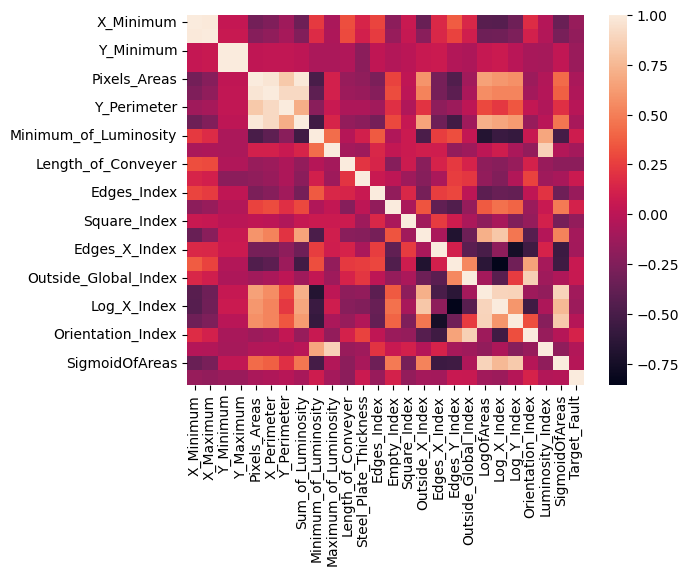

In [14]:
#Checking correlations
corrs = steel_faults_df.corr()
sns.heatmap(corrs)

In [15]:
def view_correlations(data, target, title, annot = True, fmt = '.2f', cmap = 'Greens', figsize = (22, 12)):
    fig = plt.figure(figsize = figsize, constrained_layout = True)
    gs = fig.add_gridspec(1, 3)
    
    corr_hm_ax = fig.add_subplot(gs[0, :-1])
    corr_target_ax = fig.add_subplot(gs[0, 2])
    
    mask = np.triu(data.corr())
    
    corr_hm_ax.set_title('Correlation Matrix', size = 15)
    corr_target_ax.set_title(f'Correlation to Target Faults', size = 15)
    
    sns.heatmap(data.corr(), mask = mask, annot = annot, fmt = fmt, cmap = cmap, ax = corr_hm_ax, cbar = False, annot_kws = {'size': 10})
    sns.heatmap(data.corr()[target].sort_values(ascending = False).to_frame(), annot = annot, fmt = fmt, cmap = cmap)
    
    fig.suptitle(title, size = 20)
    fig.show()


/var/folders/86/5wwfmlzj2yv_nhxq3c_g6c380000gn/T/ipykernel_9476/2687290373.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


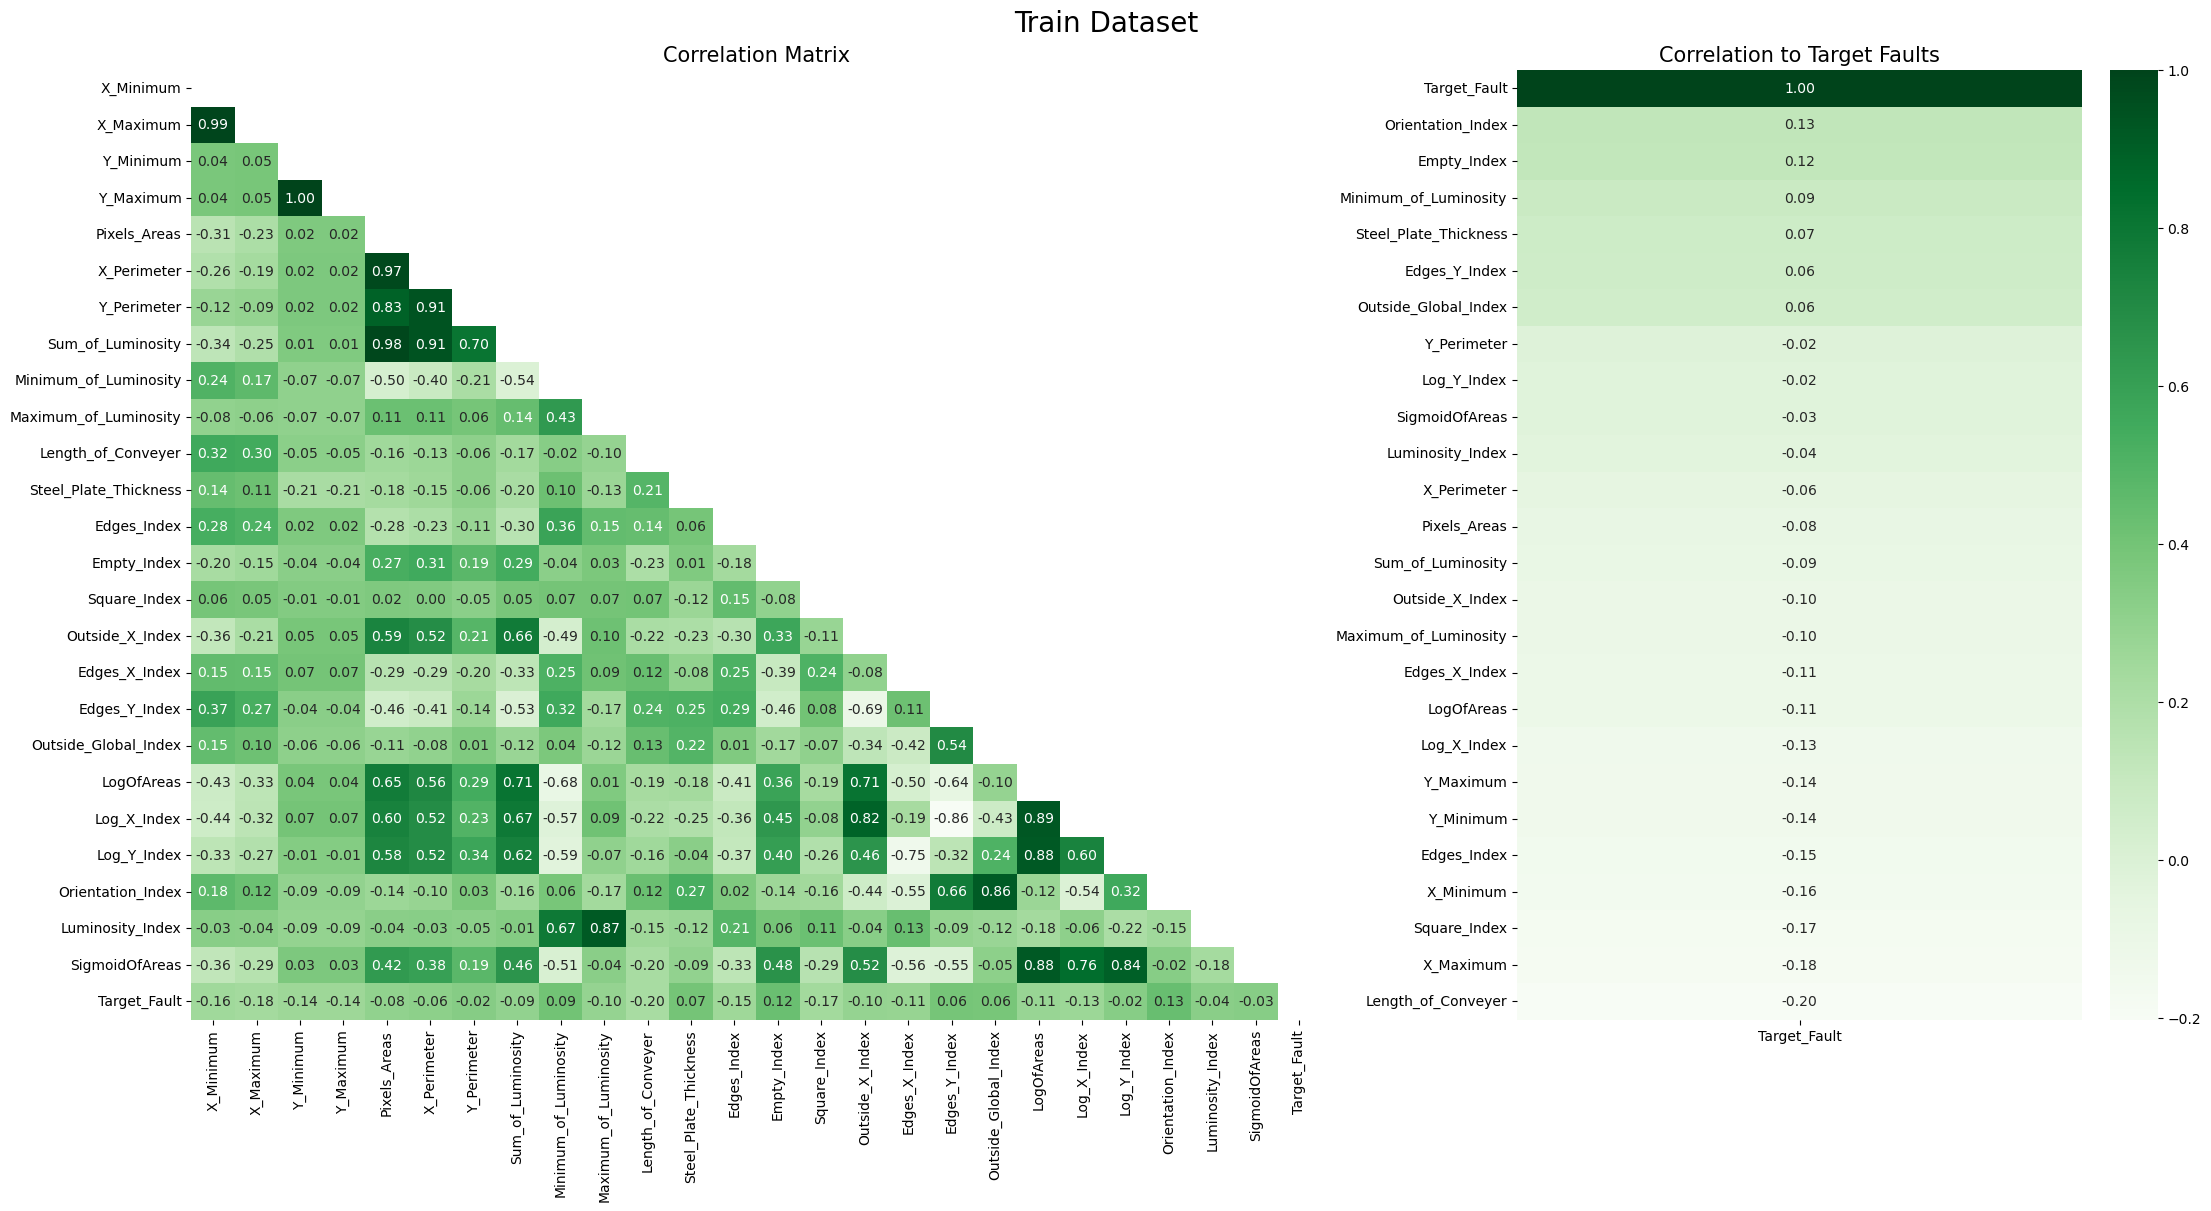

In [16]:
view_correlations(steel_faults_df, 'Target_Fault', title = 'Train Dataset')

In [17]:
#Splitting training ansd test dataset
train_dataset = steel_faults_df.sample(frac=0.7, random_state=11)
test_dataset = steel_faults_df.drop(train_dataset.index)

In [18]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
X_Minimum,5.774113e+02,5.197194e+02
X_Maximum,6.239801e+02,4.957179e+02
Y_Minimum,1.618159e+06,1.719661e+06
Y_Maximum,1.618202e+06,1.719658e+06
Pixels_Areas,1.783283e+03,3.829576e+03
X_Perimeter,1.033422e+02,1.841313e+02
Y_Perimeter,7.089919e+01,1.123205e+02
Sum_of_Luminosity,1.963253e+05,4.364895e+05
Minimum_of_Luminosity,8.441428e+01,3.209735e+01
Maximum_of_Luminosity,1.296821e+02,1.881063e+01


In [19]:
#Splitting datasets into features and label (X, y)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#Retrieve "Target_Fault" and drop it
train_labels = train_features.pop('Target_Fault')
test_labels = test_features.pop('Target_Fault')

In [20]:
#Create Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)

#fit the state of the preprocessing layer to the data by calling "Normalization.adapt"
normalizer.adapt(np.array(train_features))

----------------
#Multiple Inputs

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
                 ,metrics=[keras.metrics.AUC(), keras.metrics.Precision()]
                )
  return model

### Regression using a DNN and multiple inputs

In [22]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (1359, 25)             │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt

 Total params: 51 (208.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 51 (208.00 B)

In [23]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.3,
    verbose=0, epochs=100)

CPU times: user 9.01 s, sys: 1.58 s, total: 10.6 s
Wall time: 8.84 s


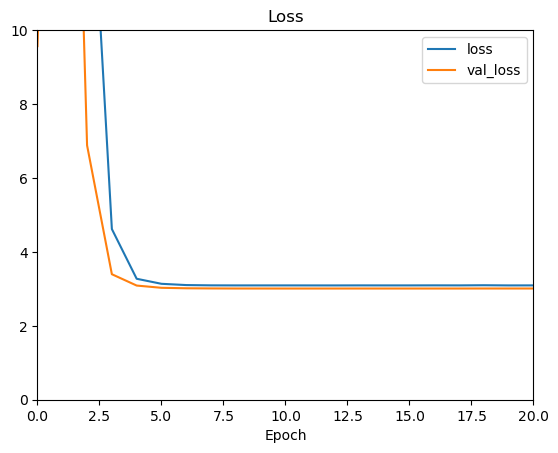

In [24]:
#Plotting Loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.ylim([0, 10])
plt.xlim([0, 20])
plt.xlabel('Epoch')
plt.legend()

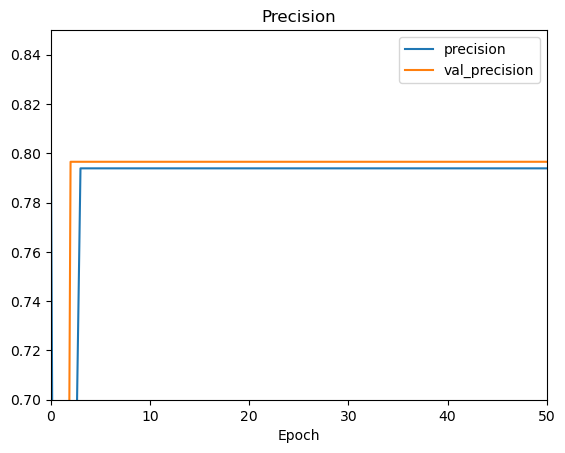

In [25]:
#Plotting precision
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision')
plt.ylim([0.7, 0.85])
plt.xlim([0, 50])
plt.xlabel('Epoch')
plt.legend()


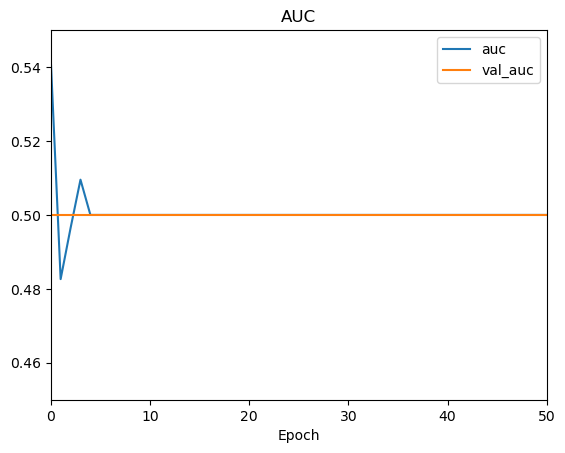

In [26]:
#Plotting AUC
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.title('AUC')
plt.ylim([0.45, 0.55])
plt.xlim([0, 50])
plt.xlabel('Epoch')
plt.legend()

In [27]:
#Evaluating the model
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [28]:
#Predictions
test_predictions = dnn_model.predict(test_features).flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


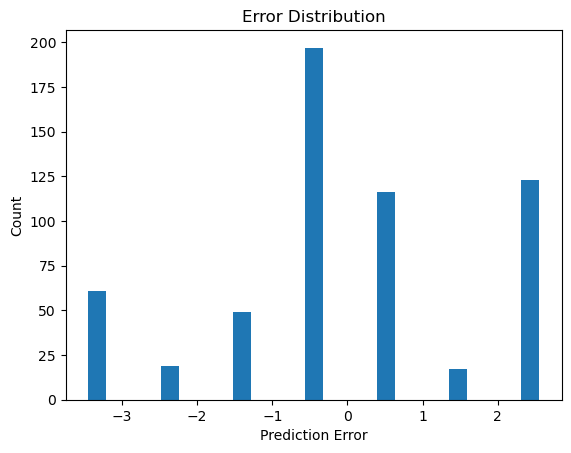

In [29]:
#Plotting the error distribution
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')